# 多层感知机的简洁实现

In [3]:
import torch
from torch import nn
import d2l.torch as d2l

相比于 $\operatorname{softmax}$ 回归的实现, 只多了一个全连接层, 一个隐藏层

In [4]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [6]:
batch_size , learning_rate, num_epochs = 256, 0.1, 100
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=learning_rate)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

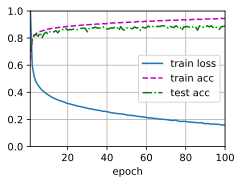

In [7]:
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer, ylim=[0,1.0])